<a href="https://colab.research.google.com/github/SharooqAtique/Machine-learning-using-python/blob/main/Logistic_Regression(basic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import Required Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Step 2: Load Dataset

In [ ]:
df=sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#checking no. of rows and columns in our dataset
df.shape

(150, 5)

In [ ]:
#checking unique values of species column
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
#checking null values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
# removing one class to make it binary
df=df[df['species']!='setosa']

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [ ]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

## Categorical to Numerical

In [ ]:
# replacing categorical values into 0 and 1
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [ ]:
df.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species
132,6.4,2.8,5.6,2.2,1
126,6.2,2.8,4.8,1.8,1
128,6.4,2.8,5.6,2.1,1
58,6.6,2.9,4.6,1.3,0
53,5.5,2.3,4.0,1.3,0
64,5.6,2.9,3.6,1.3,0
146,6.3,2.5,5.0,1.9,1
52,6.9,3.1,4.9,1.5,0
106,4.9,2.5,4.5,1.7,1
77,6.7,3.0,5.0,1.7,0


In [ ]:
#checking all the columns in our dataset
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Step 3: Select Features and Target


In [ ]:
# Splitting dataset into independent and dependent features

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']


In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,species
50,0
51,0
52,0
53,0
54,0
...,...
145,1
146,1
147,1
148,1


## Step 4: Split Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Step 5: Create and Train the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

## Step 6: Predict on Training and Testing Data

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9733333333333334
Testing Accuracy: 0.92


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

Confusion Matrix:
 [[13  1]
 [ 1 10]]


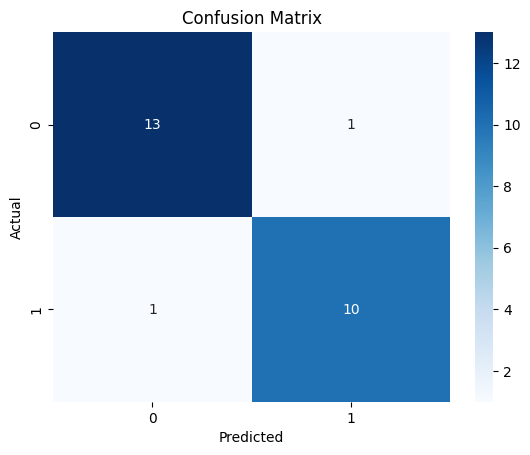

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

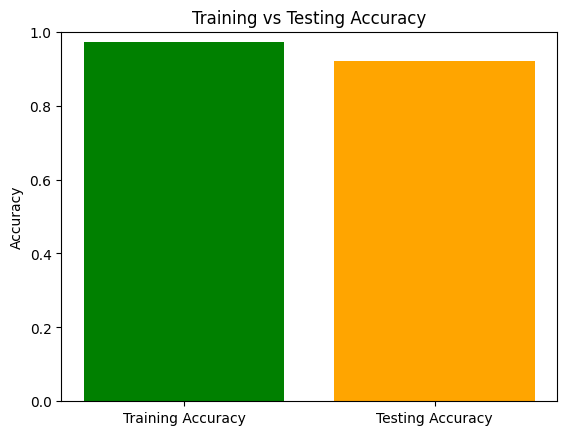

In [ ]:
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['green', 'orange'])
plt.ylim(0, 1)
plt.title("Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.show()